In [1]:
import cira

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

In [2]:
portfolio = cira.Portfolio()

In [3]:
import pandas as pd 
import numpy as np
from typing import List, Dict

In [4]:
from datetime import datetime
from os.path import exists

assets_symbols = ["MSFT", "TSLA", "AMZN"]
stk_hist_data = {}
IS_CACHED = True

for SYMBOL in assets_symbols:
    SYM_HIST_FILE = f"./{SYMBOL}.csv"

    stk = cira.Stock(SYMBOL)

    if not exists(SYM_HIST_FILE): # chacheing historical data  
        start = datetime(2015, 7, 1)
        end = datetime(2023, 7, 1)
        stk.save_historical_data(SYM_HIST_FILE, start, end)
    
    data = stk.load_historical_data(SYM_HIST_FILE)
    stk_hist_data[SYMBOL] = data



In [5]:

df = pd.DataFrame()

for sym, hist in stk_hist_data.items():
    df[sym] = hist["close"]

#df["CASH"] = 1.0

df

,MSFT,TSLA,AMZN
timestamp,,,
2016-01-04 05:00:00+00:00,48.61,14.89,31.85
2016-01-05 05:00:00+00:00,48.83,14.90,31.69
2016-01-06 05:00:00+00:00,47.94,14.60,31.63
2016-01-07 05:00:00+00:00,46.28,14.38,30.40
2016-01-08 05:00:00+00:00,46.42,14.07,30.35
...,...,...,...
2023-06-26 04:00:00+00:00,326.64,241.05,127.33
2023-06-27 04:00:00+00:00,332.58,250.21,129.18
2023-06-28 04:00:00+00:00,333.85,256.24,129.04


<Axes: xlabel='timestamp'>

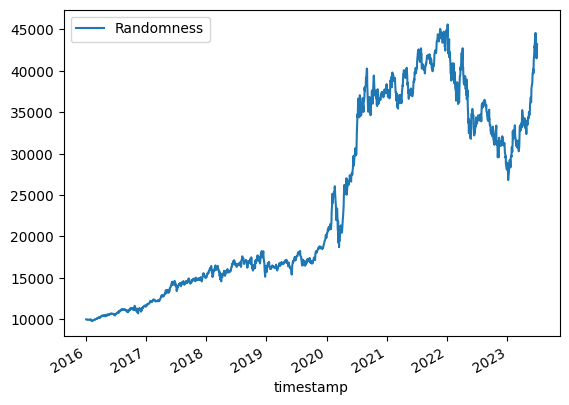

In [6]:
from cira.strategy.strategy import Randomness
from cira.strategy.backtest import back_test

strat = Randomness(-10,10, seed=23323)
bt = back_test(strat, df.copy(), df.copy(), 10_000, True)#.plot()
bt.plot()


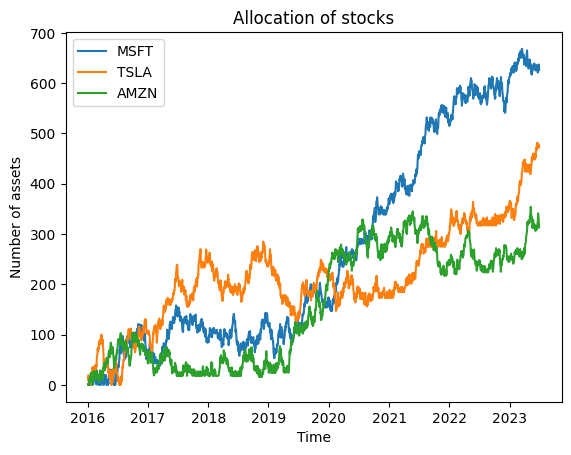

In [7]:

matrix_array = np.cumsum(strat.allocation, axis=0)
import matplotlib.pyplot as plt
for i in range(matrix_array.shape[1]):
    plt.plot(bt.index,matrix_array[:, i], label=f"{df.keys()[i]}")

plt.xlabel('Time')
plt.ylabel('Number of assets')
plt.title('Allocation of stocks')

plt.legend()
plt.show()

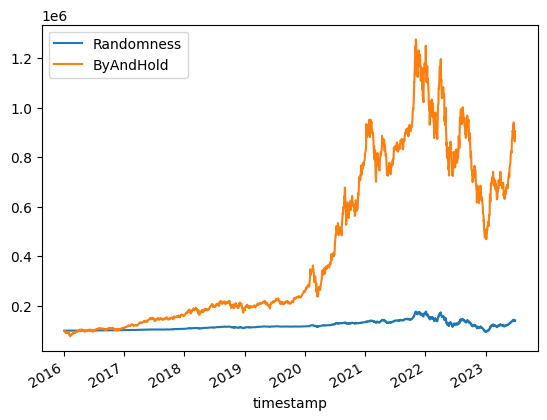

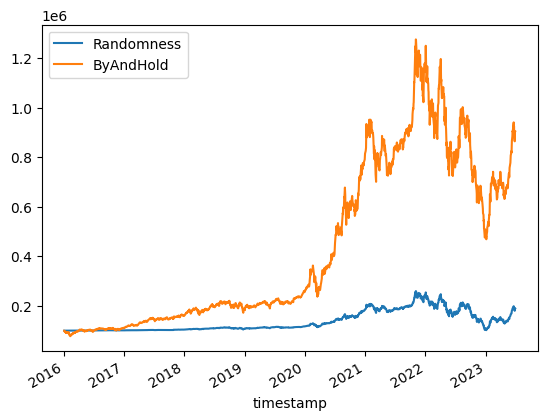

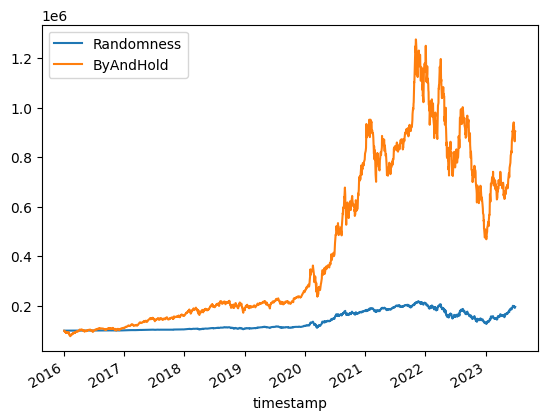

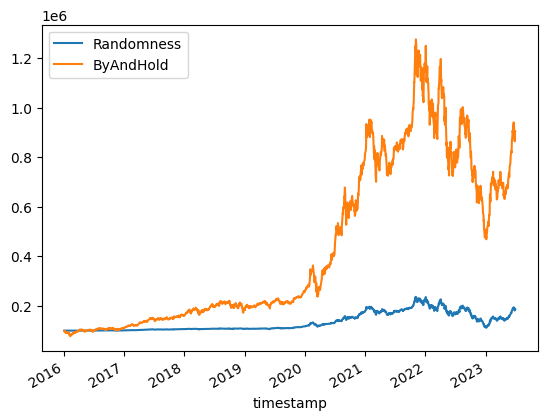

In [8]:

from cira.strategy.backtest import back_test_against_buy_and_hold
for i in range(4):
    back_test_against_buy_and_hold(Randomness(-10,10, seed=156916+i), df.copy(), df.copy(), 100_000, True).plot()

<Axes: xlabel='timestamp'>

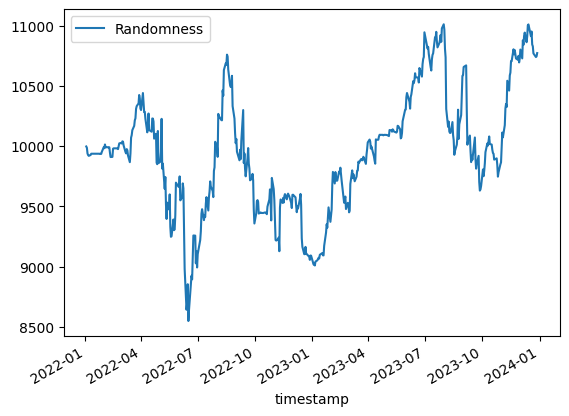

In [9]:
import cira
from cira.strategy.strategy import Randomness
from cira.strategy.backtest import back_test
from datetime import datetime
import pandas as pd

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

stock = cira.Stock("AAPL")
df = stock.historical_data_df(datetime(2022, 1, 1), datetime(2024, 1, 1))
prices = pd.DataFrame()
prices["AAPL"] = df["close"]

strat = Randomness(-10,10, seed=23323)
bt = back_test(strat, df.copy(), prices.copy(), 10_000, use_fees=True)
bt.plot()

In [2]:
import cira
cira.log.log("buy", "AAPL", 1)